# Groceries Market Basket Analysis using Apriori Algorithm
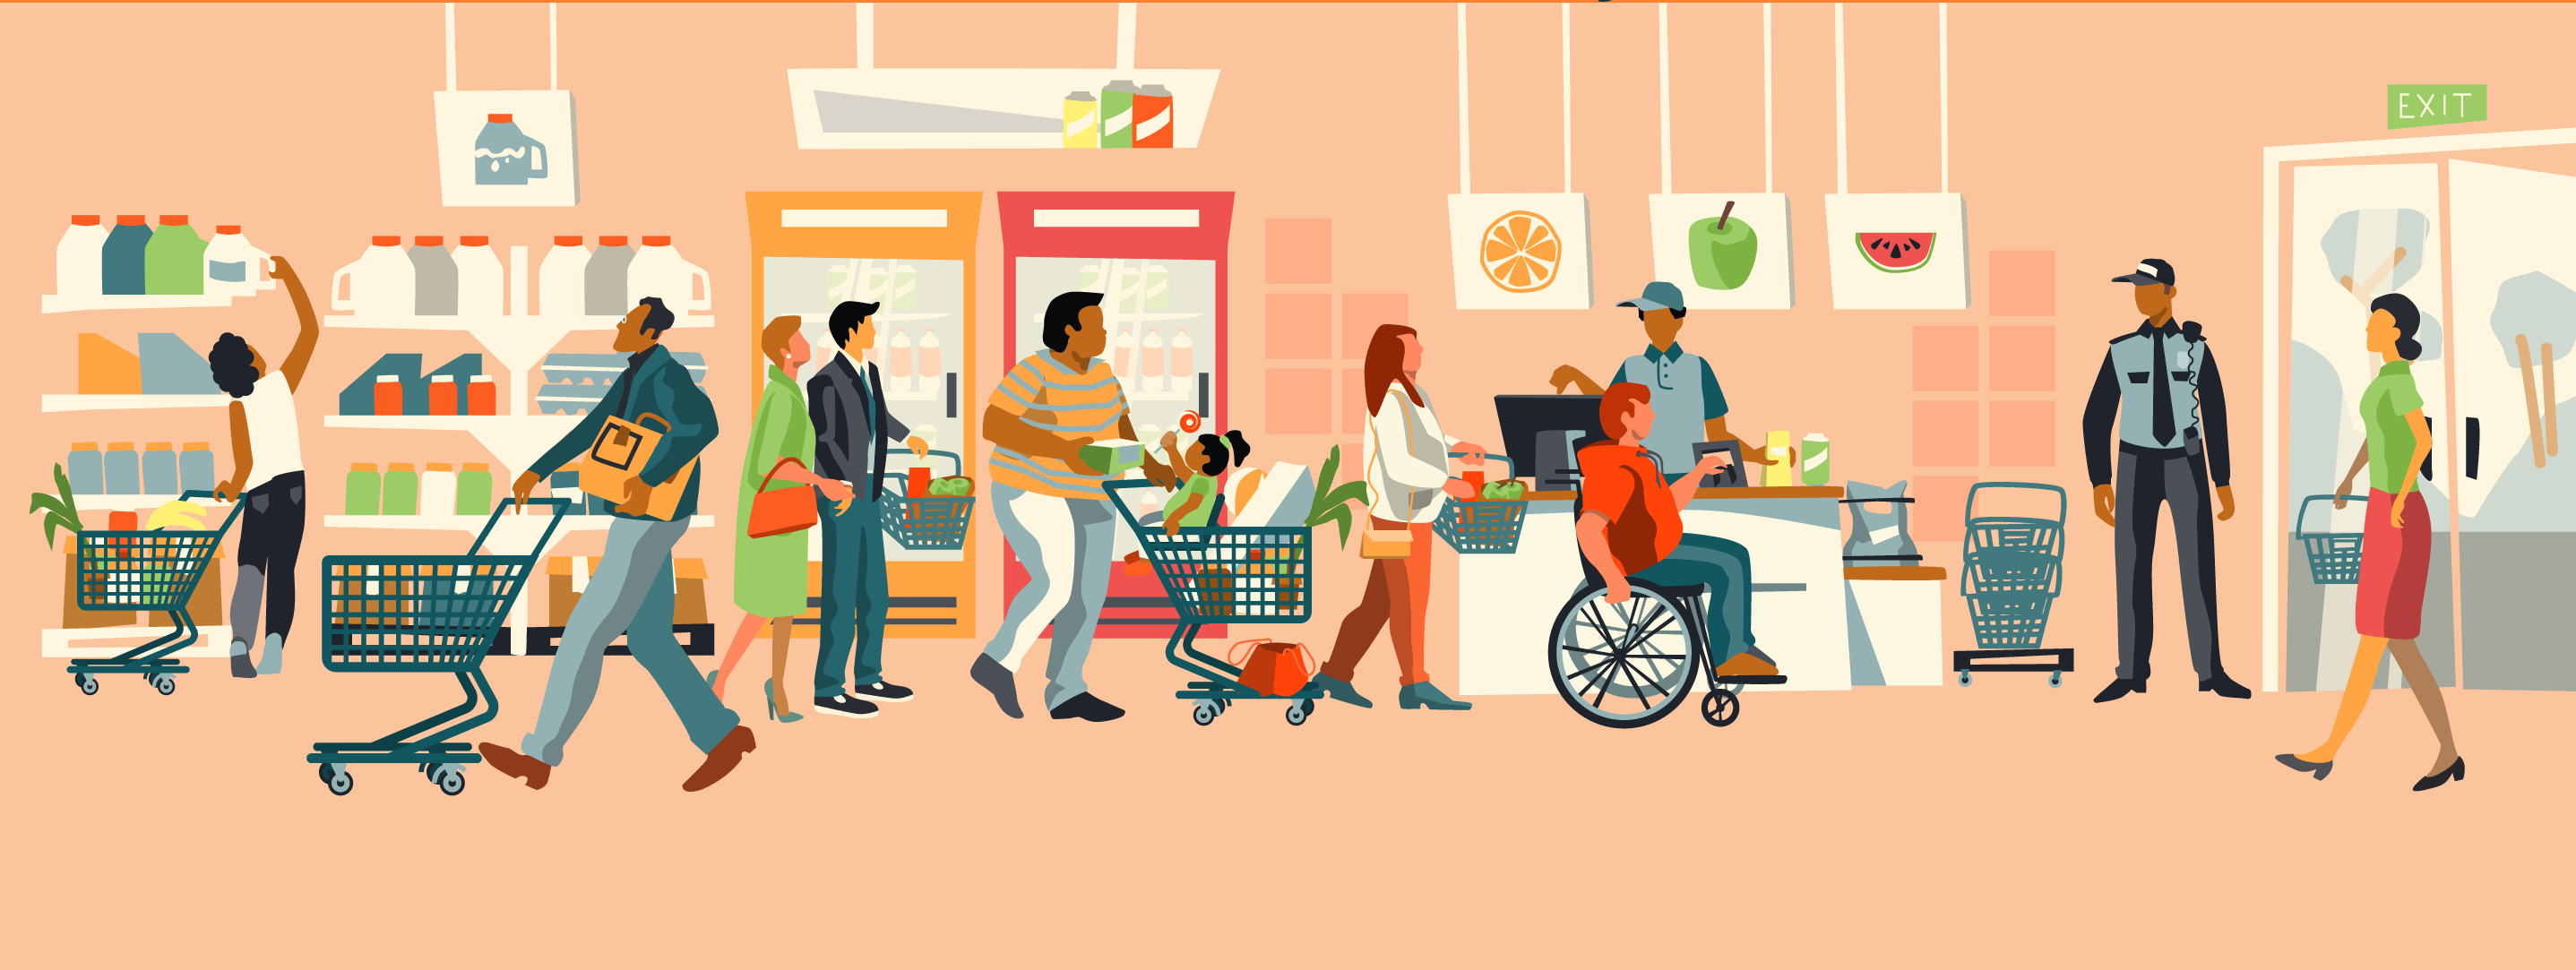

# Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Reading the Dataset

In [2]:
dataset = pd.read_csv('groceries - groceries.csv', header = None)

In [3]:
dataset.head()

0                    1               2   \
0      citrus fruit  semi-finished bread       margarine   
1    tropical fruit               yogurt          coffee   
2        whole milk                  NaN             NaN   
3         pip fruit               yogurt    cream cheese   
4  other vegetables           whole milk  condensed milk   

                         3    4    5    6    7    8    9   ...   22   23   24  \
0               ready soups  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN   
1                       NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN   
2                       NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN   
3              meat spreads  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN   
4  long life bakery product  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN   

    25   26   27   28   29   30   31  
0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
1  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
3  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
4  NaN  NaN  NaN  NaN  NaN  NaN  NaN  

[5 rows x 32 columns]

In [4]:
dataset.shape

(9835, 32)

# Wordplot

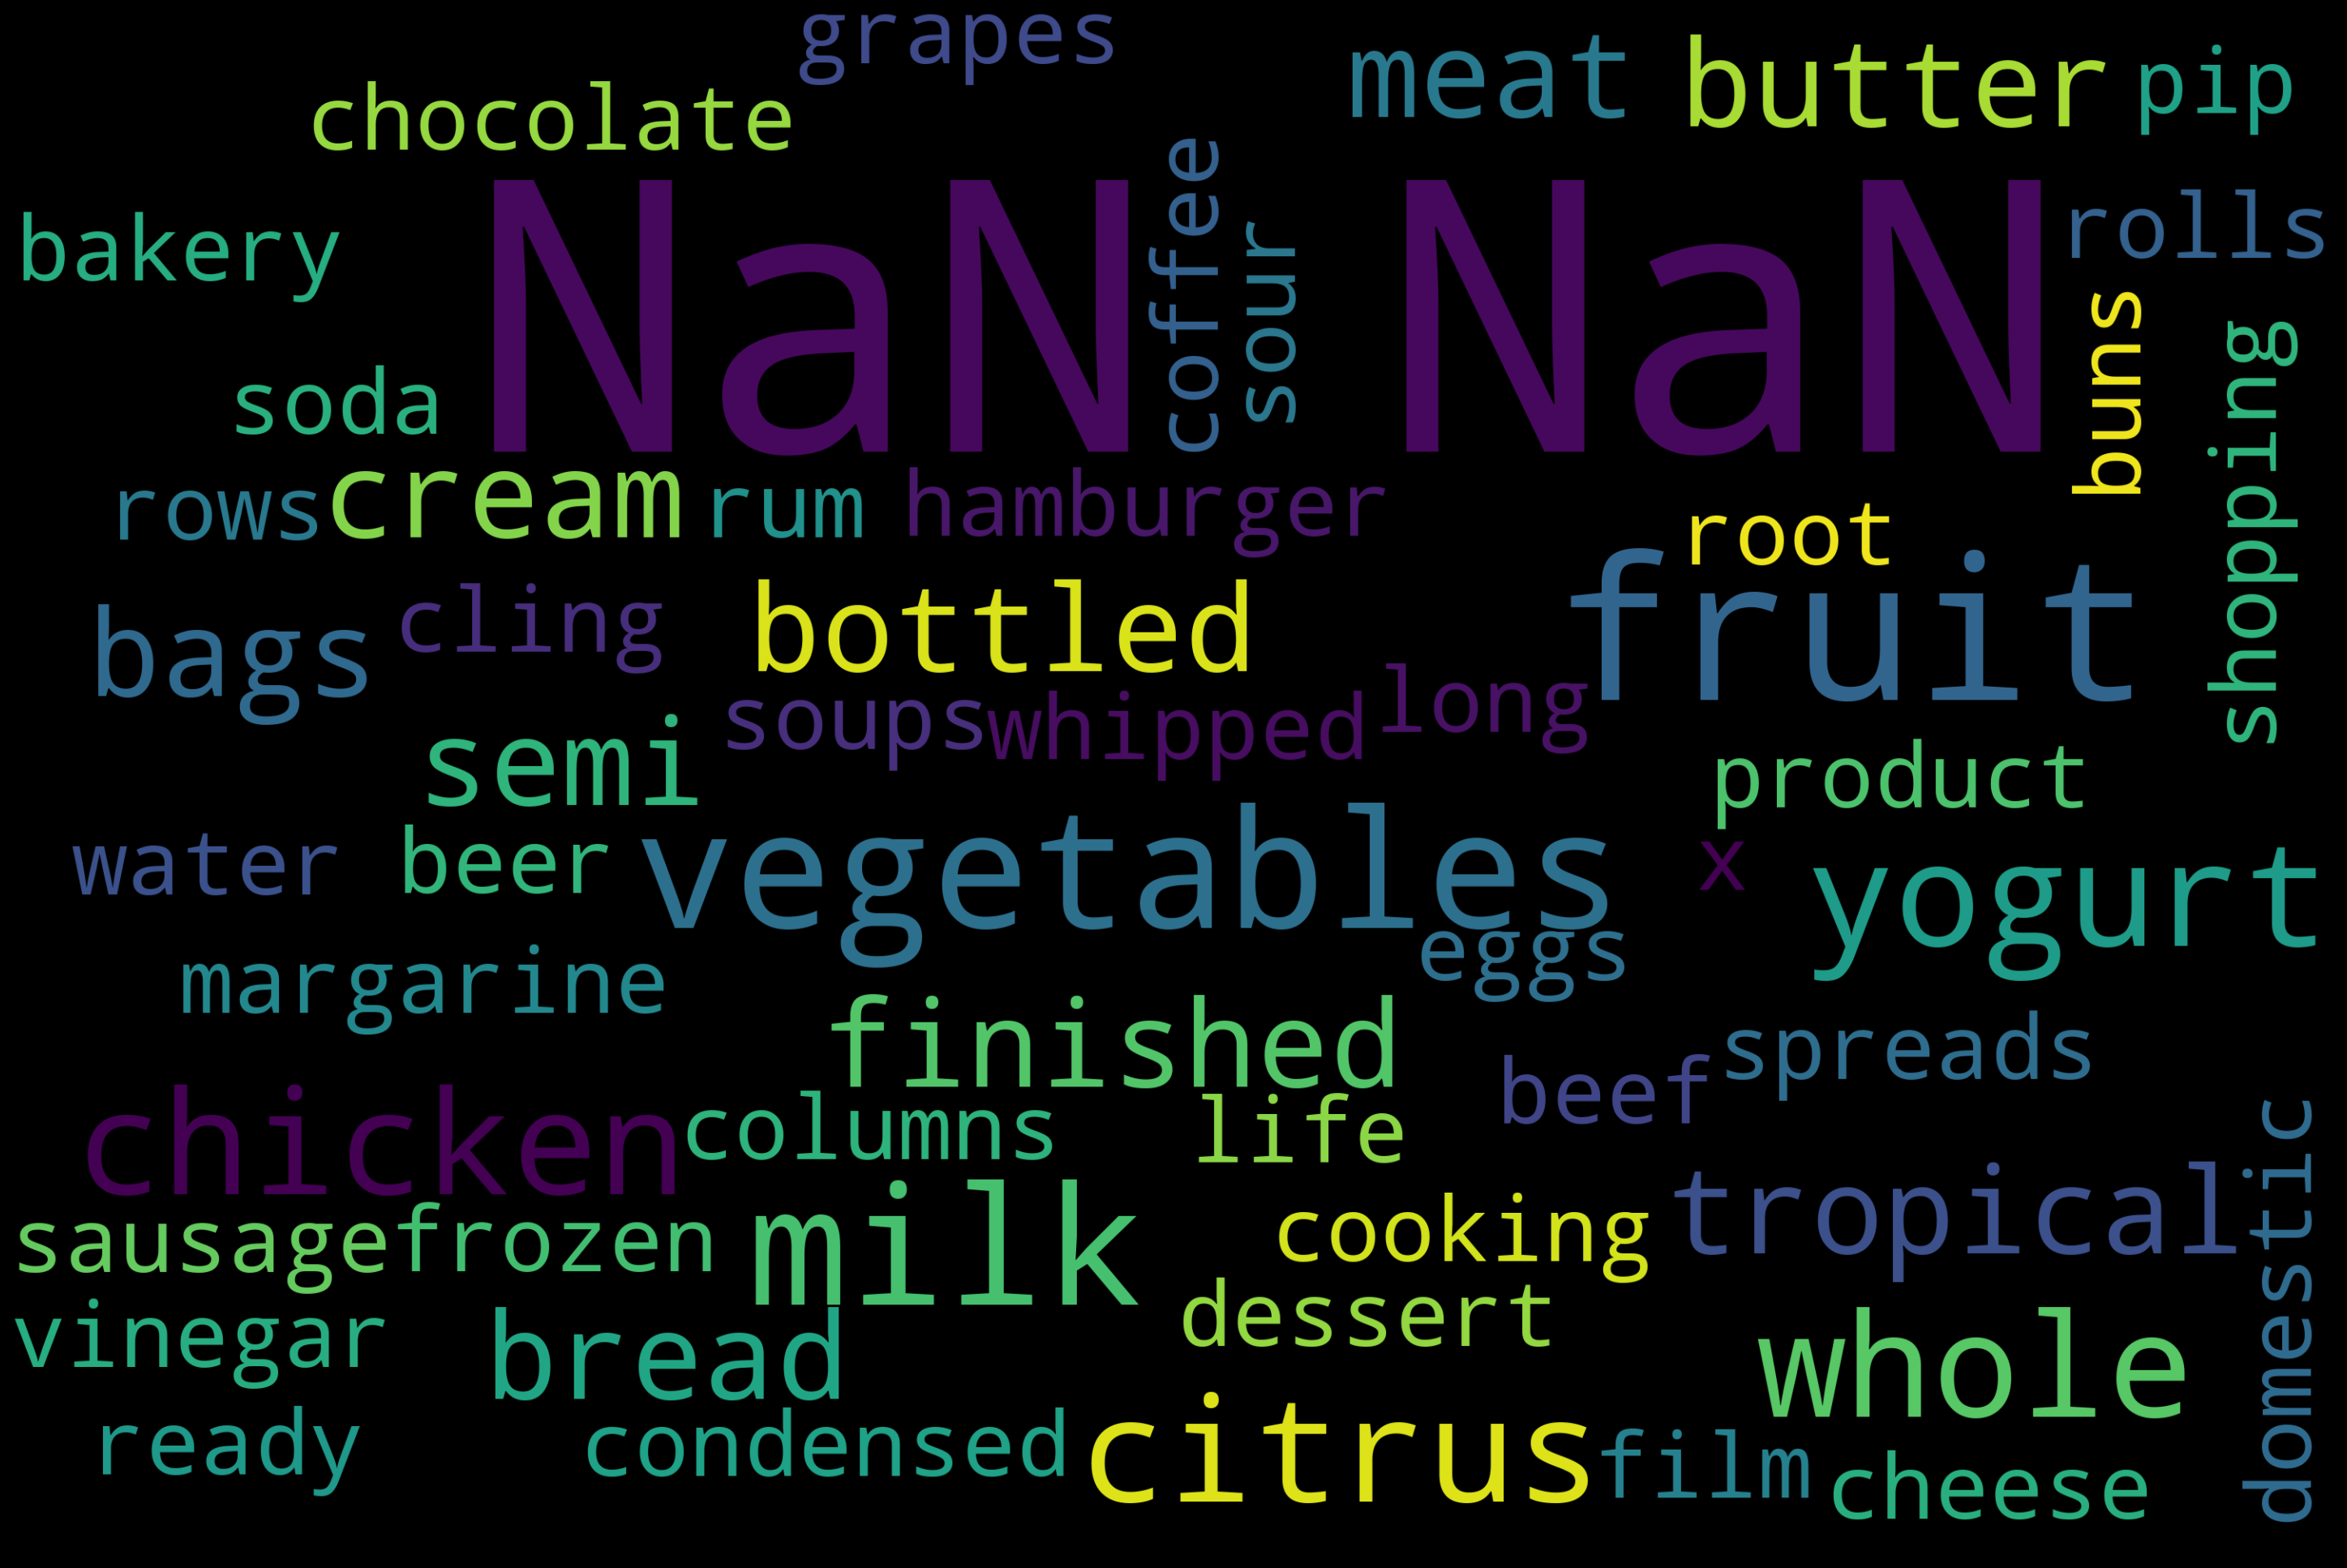

In [5]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
text = dataset
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    max_words=4000,
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

# Storing in a List

In [6]:

transactions = []
for i in range(0, 9835):
    transactions.append([str(dataset.values[i,j]) for j in range(0, 32)])

In [7]:
transactions

[['citrus fruit',
  'semi-finished bread',
  'margarine',
  'ready soups',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan'],
 ['tropical fruit',
  'yogurt',
  'coffee',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan'],
 ['whole milk',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan'],
 ['pip fruit',
  'yogurt',
  'cream cheese',
  'meat spreads',
  'nan'

# Building Apriori model 

In [8]:
from apyori import apriori
rules = apriori(transactions = transactions, min_support = 0.003, min_confidence = 0.2, min_lift = 3, min_length = 2, max_length = 2)

# Storing the Rules

In [9]:
results = list(rules)

In [10]:
results

[RelationRecord(items=frozenset({'hamburger meat', 'Instant food products'}), support=0.003050330452465684, ordered_statistics=[OrderedStatistic(items_base=frozenset({'Instant food products'}), items_add=frozenset({'hamburger meat'}), confidence=0.379746835443038, lift=11.42143769597027)]),
 RelationRecord(items=frozenset({'whipped/sour cream', 'baking powder'}), support=0.004575495678698526, ordered_statistics=[OrderedStatistic(items_base=frozenset({'baking powder'}), items_add=frozenset({'whipped/sour cream'}), confidence=0.25862068965517243, lift=3.607850330154072)]),
 RelationRecord(items=frozenset({'beef', 'root vegetables'}), support=0.017386883579054397, ordered_statistics=[OrderedStatistic(items_base=frozenset({'beef'}), items_add=frozenset({'root vegetables'}), confidence=0.3313953488372093, lift=3.0403668431100312)]),
 RelationRecord(items=frozenset({'whipped/sour cream', 'berries'}), support=0.009049313675648195, ordered_statistics=[OrderedStatistic(items_base=frozenset({'be

# Storing the Rules into Dataframe

In [11]:
def inspect(results):
    lhs         = [tuple(result[2][0][0])[0] for result in results]
    rhs         = [tuple(result[2][0][1])[0] for result in results]
    supports    = [result[1] for result in results]
    confidences = [result[2][0][2] for result in results]
    lifts       = [result[2][0][3] for result in results]
    return list(zip(lhs, rhs, supports, confidences, lifts))
df = pd.DataFrame(inspect(results), columns = ['Left Hand Side', 'Right Hand Side', 'Support', 'Confidence', 'Lift'])

### Displaying the results non sorted

In [12]:
df.shape

(13, 5)

In [22]:
df

Left Hand Side     Right Hand Side   Support  Confidence  \
0   Instant food products      hamburger meat  0.003050    0.379747   
1           baking powder  whipped/sour cream  0.004575    0.258621   
2                    beef     root vegetables  0.017387    0.331395   
3                 berries  whipped/sour cream  0.009049    0.272171   
4                  liquor        bottled beer  0.004677    0.422018   
5          red/blush wine        bottled beer  0.004881    0.253968   
6                   flour           margarine  0.003762    0.216374   
7                   flour               sugar  0.004982    0.286550   
8                   flour  whipped/sour cream  0.004067    0.233918   
9                   herbs     root vegetables  0.007016    0.431250   
10       processed cheese         white bread  0.004169    0.251534   
11                   rice     root vegetables  0.003152    0.413333   
12          sliced cheese             sausage  0.007016    0.286307   

         Lift                               New Rules  
0   11.421438  Instant food products + hamburger meat  
1    3.607850      baking powder + whipped/sour cream  
2    3.040367                  beef + root vegetables  
3    3.796886            berries + whipped/sour cream  
4    5.240594                   liquor + bottled beer  
5    3.153760           red/blush wine + bottled beer  
6    3.694516                       flour + margarine  
7    8.463112                           flour + sugar  
8    3.263241              flour + whipped/sour cream  
9    3.956477                 herbs + root vegetables  
10   5.975445          processed cheese + white bread  
11   3.792102                  rice + root vegetables  
12   3.047435                 sliced cheese + sausage

# Making a New Column for the New Rules

In [15]:
df["New Rules"] = df["Left Hand Side"].map(str) + " + " + df["Right Hand Side"]

In [23]:
df

Left Hand Side     Right Hand Side   Support  Confidence  \
0   Instant food products      hamburger meat  0.003050    0.379747   
1           baking powder  whipped/sour cream  0.004575    0.258621   
2                    beef     root vegetables  0.017387    0.331395   
3                 berries  whipped/sour cream  0.009049    0.272171   
4                  liquor        bottled beer  0.004677    0.422018   
5          red/blush wine        bottled beer  0.004881    0.253968   
6                   flour           margarine  0.003762    0.216374   
7                   flour               sugar  0.004982    0.286550   
8                   flour  whipped/sour cream  0.004067    0.233918   
9                   herbs     root vegetables  0.007016    0.431250   
10       processed cheese         white bread  0.004169    0.251534   
11                   rice     root vegetables  0.003152    0.413333   
12          sliced cheese             sausage  0.007016    0.286307   

         Lift                               New Rules  
0   11.421438  Instant food products + hamburger meat  
1    3.607850      baking powder + whipped/sour cream  
2    3.040367                  beef + root vegetables  
3    3.796886            berries + whipped/sour cream  
4    5.240594                   liquor + bottled beer  
5    3.153760           red/blush wine + bottled beer  
6    3.694516                       flour + margarine  
7    8.463112                           flour + sugar  
8    3.263241              flour + whipped/sour cream  
9    3.956477                 herbs + root vegetables  
10   5.975445          processed cheese + white bread  
11   3.792102                  rice + root vegetables  
12   3.047435                 sliced cheese + sausage

# Left Side Word Plot

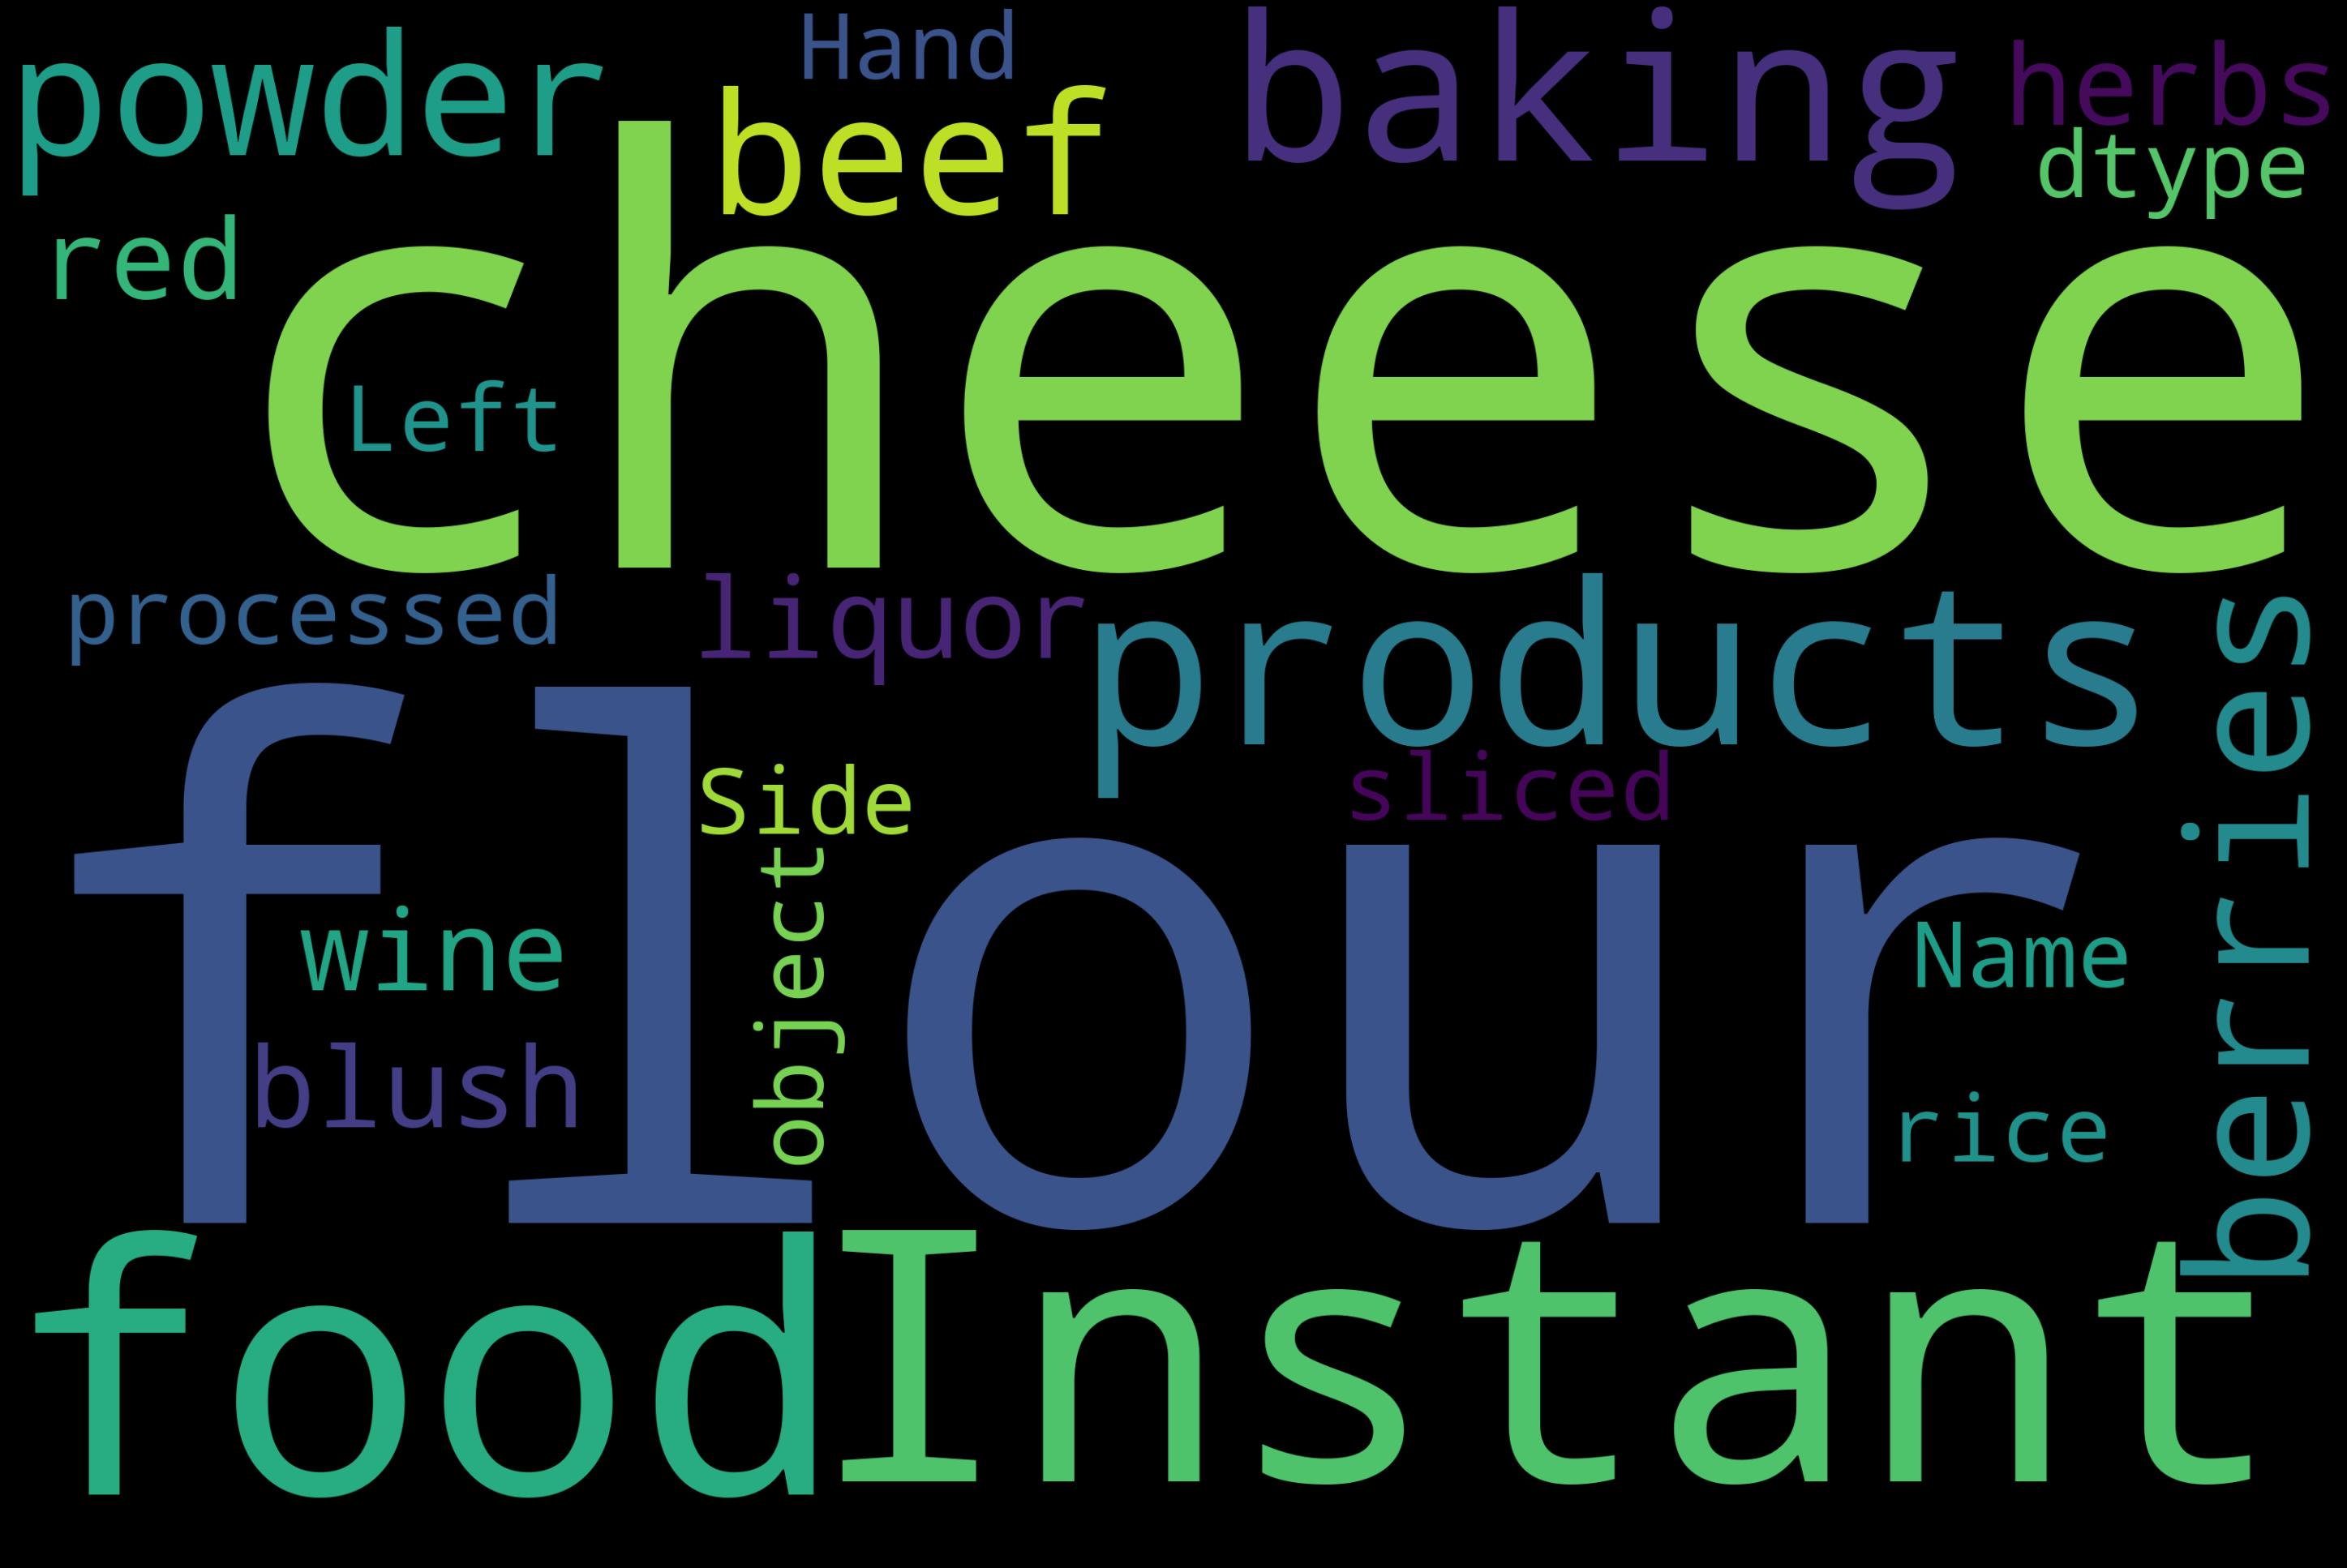

In [17]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
text = df['Left Hand Side']
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    max_words=4000,
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

# Right Side Word Plot

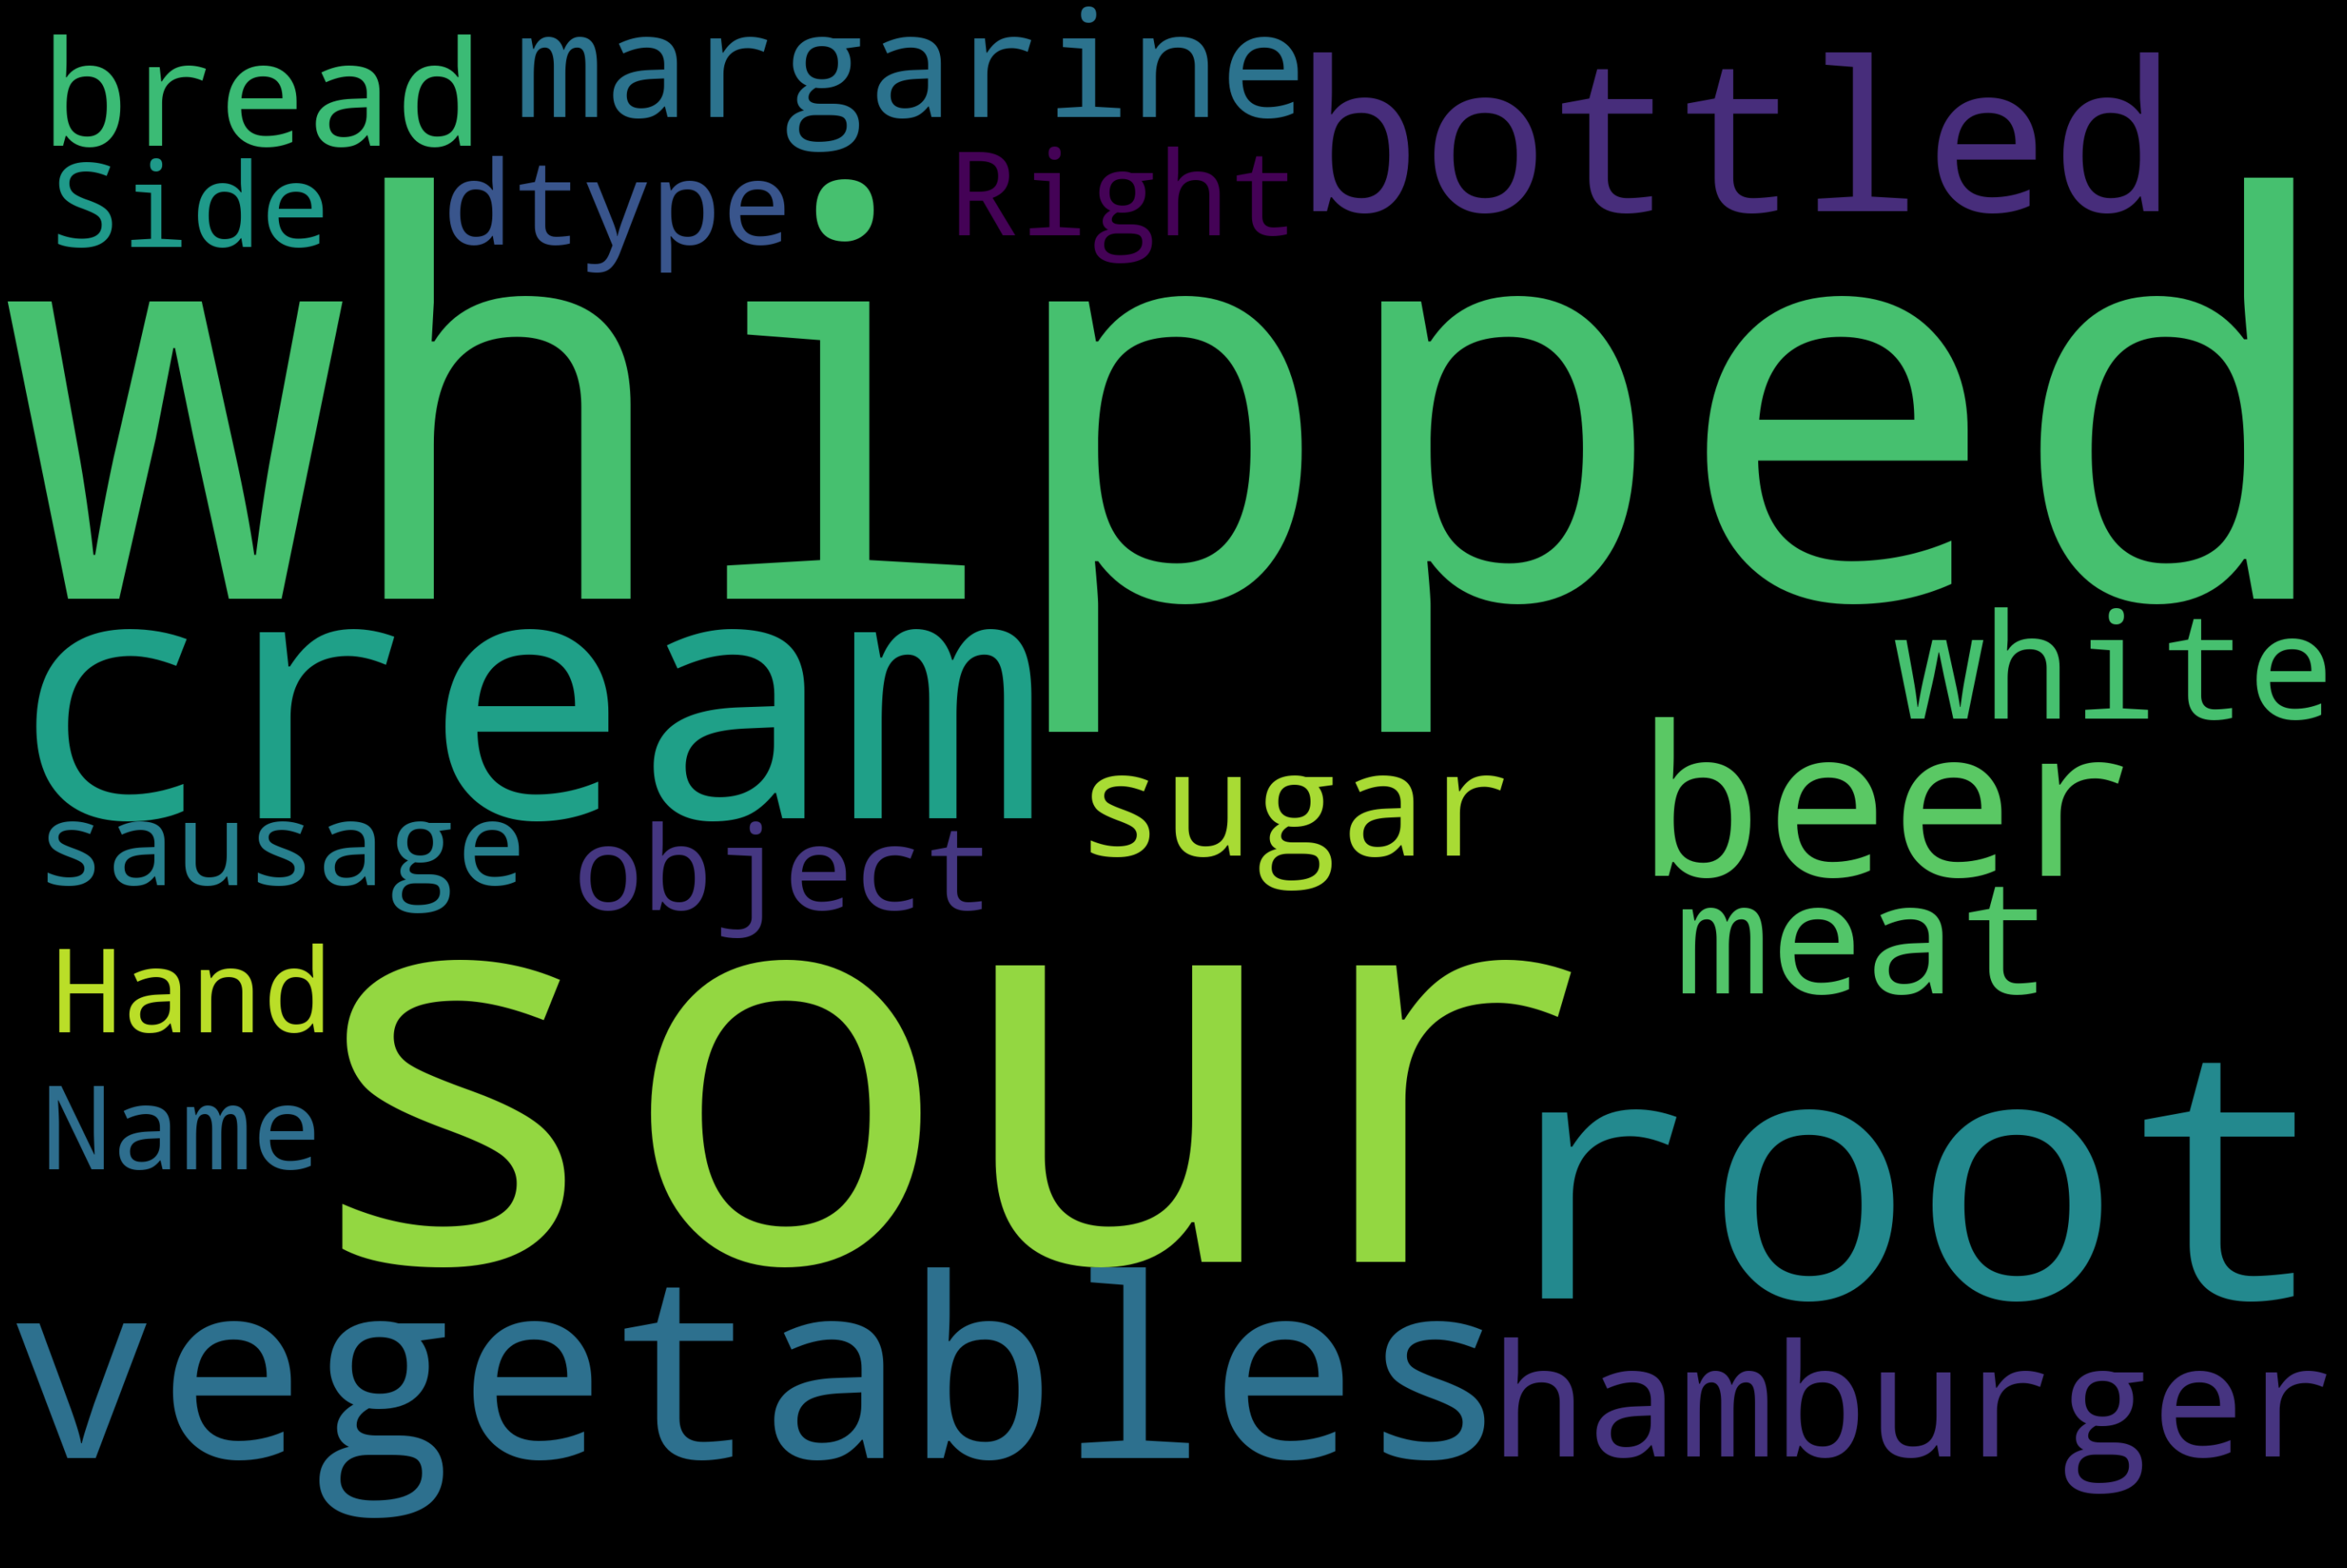

In [18]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
text = df['Right Hand Side']
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    max_words=4000,
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

# Support Plot

In [19]:
import plotly.express as px

fig = px.histogram(df, y="New Rules",x="Support",title= "Support")
fig.show()

# Confidence Plot

In [20]:
fig = px.histogram(df, y="New Rules",x="Confidence",title="Confidence")
fig.show()

# Lift Plot

In [21]:
fig = px.histogram(df, y="New Rules",x="Lift",title="Lift")
fig.show()

# Initially We have Raw Groceries Data, but After Applying Apriroi Algorithm we Now have 13 New rules That will Most-likely be Sold Together and Fast . 